# Python Notebook 4: Naive Bayes
**Statistical Machine Learning Course**<br>
Dept of Statistics, University of Oxford<br>
Author: F. Caron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm # normalpdf

# Default plotting parameters
font = {'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.dpi'] = 100
# For saving the figures
svfigs = False # True if you want to save figures
svdir = './figures/' # directory to save the figures
if svfigs: # set a higher resolution if saving the figures
    plt.rcParams['figure.dpi'] = 150
else:
    plt.rcParams['figure.dpi'] = 75 

In [2]:
# Load Titanic data
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic[['Survived','Pclass', 'Sex', 'Age']]
titanic

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
882,0,2,male,27.0
883,1,1,female,19.0
884,0,3,female,7.0
885,1,1,male,26.0


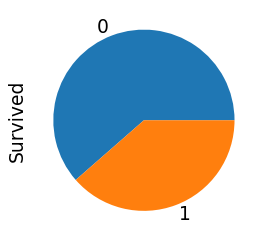

In [3]:
# Proportion of Survivors
titanic.Survived.value_counts().plot(kind = 'pie', legend=False);

<Figure size 450x300 with 0 Axes>

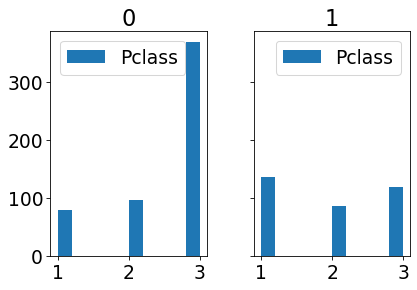

<Figure size 450x300 with 0 Axes>

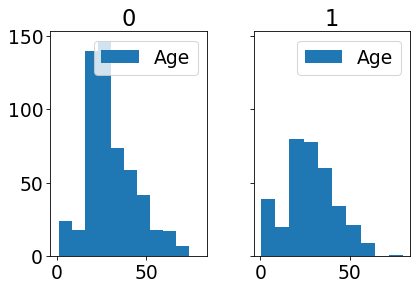

<Figure size 450x300 with 0 Axes>

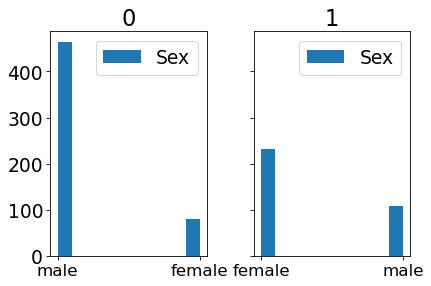

In [4]:
# Plot histogram of class, age and sex for both those who survived and those who didn't
plt.figure()
titanic['Pclass'].hist(by=titanic['Survived'], sharex=True, sharey=True, legend='Class', xrot=0)
if svfigs:
    plt.savefig(svdir + 'titanic1.png', bbox_inches = 'tight')
    
plt.figure()
titanic['Age'].hist(by=titanic['Survived'], sharex=True, sharey=True, legend='True', xrot=0)
if svfigs:
    plt.savefig(svdir + 'titanic2.png', bbox_inches = 'tight')


plt.figure()
titanic['Sex'].hist(by=titanic['Survived'], sharey=True, legend='True', xrot=0, xlabelsize=16)

if svfigs:
    plt.savefig(svdir + 'titanic3.png', bbox_inches = 'tight');

In [5]:
# Calculate estimate of probability of surviving
counts_survived = titanic['Survived'].value_counts()
n = counts_survived.sum()
pi = counts_survived / n
print('Estimated class probabilities:\n', pi)

Estimated class probabilities:
 0    0.614431
1    0.385569
Name: Survived, dtype: float64


In [6]:
# For the age variable, we assume a Gaussian model: estimate the mean and variance 
mu_age = titanic.groupby(['Survived']).Age.mean()
std_age = titanic.groupby(['Survived']).Age.std()
print('Mean:\n', mu_age)
print('\nStd:\n', std_age)

Mean:
 Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

Std:
 Survived
0    13.898317
1    14.427863
Name: Age, dtype: float64


In [7]:
# For the Sex, assume a Bernoulli model, and estimate the proportions 
counts_sex = titanic.groupby(['Survived']).Sex.value_counts()
prop_sex_0 = counts_sex[0]/counts_survived[0]
prop_sex_1 = counts_sex[1]/counts_survived[1]
print('Survived=0:\n', prop_sex_0)
print('\nSurvived=1:\n', prop_sex_1)

Survived=0:
 Sex
male      0.851376
female    0.148624
Name: Sex, dtype: float64

Survived=1:
 Sex
female    0.681287
male      0.318713
Name: Sex, dtype: float64


In [8]:
# For the PClass, assume a Bernoulli model, and estimate the proportions 
counts_pclass = titanic.groupby(['Survived']).Pclass.value_counts()
prop_pclass_0 = counts_pclass[0]/counts_survived[0]
prop_pclass_1 = counts_pclass[1]/counts_survived[1]
print('Survived=0:\n',prop_pclass_0)
print('\nSurvived=1:\n',prop_pclass_1)

Survived=0:
 Pclass
3    0.675229
2    0.177982
1    0.146789
Name: Pclass, dtype: float64

Survived=1:
 Pclass
1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64


In [9]:
# Define the learned classifier
def h_naive(pclass, sex, age):
    logp0 = np.log(pi[0]) +  np.log(prop_sex_0[sex]) + np.log(prop_pclass_0[pclass]) + norm.logpdf(age, mu_age[0], std_age[0])
    logp1 = np.log(pi[1]) + np.log(prop_sex_1[sex]) + np.log(prop_pclass_1[pclass]) + norm.logpdf(age, mu_age[1], std_age[1])
    if logp1>logp0:
        y_hat = 1 # predict survival
    else:
        y_hat = 0
    return (y_hat, np.exp(logp1)/(np.exp(logp0)+np.exp(logp1))) # return the binary class and Pr(Y=1|X=x)

In [10]:
# Compute prediction and probabilities for some values
(y_hat, proba_hat) = h_naive(3, 'female', 30) # Female in 3rd class, aged 30
print('Female in 3rd class, 30y: Survive=', y_hat, ' | Prob. Survive=' , proba_hat)
(y_hat, proba_hat) = h_naive(1, 'female', 30) # Female in 1st class, aged 30
print('Female in 1st class, 30y: Survive=', y_hat, ' | Prob. Survive=' , proba_hat)

Female in 3rd class, 30y: Survive= 1  | Prob. Survive= 0.5866603485676527
Female in 1st class, 30y: Survive= 1  | Prob. Survive= 0.8818184370776185


In [11]:
# Compute prediction and probabilities for some values
(y_hat, proba_hat) = h_naive(3, 'male', 20)
print('Male in 3rd class, 20y: Survive=', y_hat, ' | Prob. Survive=' , proba_hat)
(y_hat, proba_hat) = h_naive(1, 'male', 20)
print('Male in 1st class, 20y: Survive=', y_hat, ' | Prob. Survive=' , proba_hat)

Male in 3rd class, 20y: Survive= 0  | Prob. Survive= 0.11378328709019185
Male in 1st class, 20y: Survive= 0  | Prob. Survive= 0.4029765134132923
